## JAZMIN VIVIANA SANTOYO VEGA
###**Sistema de Comunicación de un Robot Espacial**
####**Teoría de la Información **

In [134]:
import random
import pickle
import math
import matplotlib.pyplot as plt
from collections import Counter

###Fuente de Información

In [135]:
# Aquí la fuente de información son los sensores del robot recopilan datos
def recopilar_datos():
  # Simulacion de algunos atributos que recopila el sensor del robot
  objetos = ["mineral", "roca", "cristal", "hielo", "agua", "meteorito", "objeto no identificado"]
  ubicacion = (random.uniform(-1000, 1000), random.uniform(-1000, 1000), random.uniform(-1000, 1000))
  imagenes = ["imagen1.jpg", "imagen2.jpg"]

  objeto = random.choice(objetos)
  datos_recopilados = {
      "Se detectó": objeto,
      "Ubicación": ubicacion,
      "Imagenes": imagenes
  }
  return datos_recopilados

### Transmisor

In [136]:
# Con esta función pretendo simular la transmisión de datos
# para esto el robot codifica los datos a binario para poder comprenderlos y transmitirlos
def transmisor_de_la_nave_espacial(datos_recopilados):
    objeto_codificado = ''.join(format(ord(c), '08b') for c in datos_recopilados["Se detectó"])
    ubicacion_codificada = ''.join(format(int(val), '016b') for val in datos_recopilados["Ubicación"])
    imagenes = datos_recopilados["Imagenes"]
    datos_transmitidos = {
        "Se detectó": objeto_codificado,
        "Ubicación": ubicacion_codificada,
        "Imagenes": imagenes
    }
    return datos_transmitidos

###Canal

In [137]:
# Este es el medio por el que viajaran los datos transmitidos
# esta función simula el canal, en este caso es por medio de fibra óptica
def fibra_optica(datos_transmitidos):
    objeto_codificado = datos_transmitidos["Se detectó"]
    ubicacion_codificada = datos_transmitidos["Ubicación"]
    imagenes_codificada = datos_transmitidos["Imagenes"]
    datos_con_ruido = datos_transmitidos.copy()

    """ DETALLES DE LA FIBRA ÓPTICA"""
    # longitud de la fibra en km
    longitud_km = 15
    # velocidad de la luz en ms
    velocidad_ms = 7000
    # longitud de la fibra a metros
    longitud_m = longitud_km * 1000
    # tiempo de propagación en segundos
    tiempo = longitud_m / velocidad_ms

    """ ENTROPÍA """
    # lista de valores random
    valores_random = [0,0.01, 0.01, 0.015, 0.02, 0.025, 0.03, 0.08, 0.02, 0.035, 0.04, 0.045, 0.05, 0.01,0.045, 0.055, 0.06, 0.065, 0.07, 0.75, 0.08, 0.085] # 22 eventos
    num_random = random.choice(valores_random)

    # alguno de los porcentajes de esta lista determina el porcentaje de bits a cambiar
    # en caso de que haya salido en num_random
    porcentaje_ruido = [0,0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.045, 0.05, 0.065, 0.07]  # 11 eventos

    # contar aquellos valores que se repiten en porcentaje_ruido
    # evento 2: 0.01 se repite 3 veces
    contador = Counter(valores_random)

    # probabilidades de que cada evento de porcentaje_ruido ocurra en relación con el total de eventos en valores_random
    total_eventos = len(valores_random)
    probabilidades = [contador[valor] / total_eventos for valor in porcentaje_ruido] # por ejemplo para evento2:  3/22

    # Guardo la entropía de cada evento para visualizar después en grafica
    entropias = [-p * math.log2(p) if p > 0 else 0 for p in probabilidades]
    # entropia total
    entropia = -sum(p * math.log2(p) for p in probabilidades if p > 0)
    # lista de la cantidad de eventos
    cantidad_eventos = list(range(1, len(probabilidades) + 1))
    """ INTRODUCIMOS RUIDO """

    # determinamos si se debe agregar ruido al objeto
    if num_random in porcentaje_ruido:
        for i in range(len(objeto_codificado)):
            if random.random() < num_random:
                datos_con_ruido["Se detectó"] = datos_con_ruido["Se detectó"][:i] + ('1' if objeto_codificado[i] == '0' else '0') + datos_con_ruido["Se detectó"][i+1:]

        #  si se debe agregar ruido a la ubicación
    if num_random in porcentaje_ruido:
        for i in range(len(ubicacion_codificada)):
            if random.random() < num_random:
                datos_con_ruido["Ubicación"] = datos_con_ruido["Ubicación"][:i] + ('1' if ubicacion_codificada[i] == '0' else '0') + datos_con_ruido["Ubicación"][i+1:]

    return datos_con_ruido, tiempo, probabilidades, entropias, entropia, porcentaje_ruido, cantidad_eventos

### Receptor

In [138]:
# Esta función simula una parte del sistema de recepcion de la Estación Espacial
# que se encargar de recibir los datos del robot espacial y los decodifica para procesarlos
# y sea de utilidad a los científicos
def receptor(datos_con_ruido):
    objeto_codificado_con_ruido = datos_con_ruido["Se detectó"]
    ubicacion_codificada_con_ruido = datos_con_ruido["Ubicación"]
    imagenes = datos_con_ruido["Imagenes"]
    objeto_decodificado = ''.join(chr(int(objeto_codificado_con_ruido[i:i+8], 2)) for i in range(0, len(objeto_codificado_con_ruido), 8))
    ubicacion_decodificada = tuple(int(ubicacion_codificada_con_ruido[i:i+16], 2) for i in range(0, len(ubicacion_codificada_con_ruido), 16))

    datos_decodificados = {
        "Se detectó": objeto_decodificado,
        "Ubicación": ubicacion_decodificada,
        "Imagenes": imagenes
    }
    return datos_decodificados

### Destino de Información

#### Simulamos que la información ha llegado a la Estación Espacial

In [139]:
# Finalmente la información ha llegado a los científicos de la Estación Espacial
print("===== Datos Recibidos en la Estación Espacial =====")
print("===== Perseverance 2.1 ha capturado los siguientes datos ===== \n")
# Guardamos las funciones en variables
info_original = recopilar_datos()
info_transmitida = transmisor_de_la_nave_espacial(info_original)
info_canal, tiempo_propagacion, probabilidades,entropias, entropia, porcentaje_ruido, cantidad_eventos = fibra_optica(info_transmitida)
info_receptada = receptor(info_canal)
print(info_receptada)
info_canal, tiempo_propagacion, probabilidades,entropias, entropia, porcentaje_ruido, cantidad_eventos= fibra_optica(info_transmitida)
print(f"\nEl tiempo de propagación fue de: {tiempo_propagacion} segundos\n")

===== Datos Recibidos en la Estación Espacial =====
===== Perseverance 2.1 ha capturado los siguientes datos ===== 

{'Se detectó': 'oineral', 'Ubicación': (698, -89, 31), 'Imagenes': ['imagen1.jpg', 'imagen2.jpg']}

El tiempo de propagación fue de: 2.142857142857143 segundos



### Probabilidades

In [140]:
print("Probabilidades de que cada evento de porcentaje_ruido ocurra en relación con el total de eventos en valores_random:\n")
for i, probabilidad in enumerate(probabilidades, 1):
  print(f"Evento {i}: {probabilidad}")

Probabilidades de que cada evento de porcentaje_ruido ocurra en relación con el total de eventos en valores_random:

Evento 1: 0.045454545454545456
Evento 2: 0.13636363636363635
Evento 3: 0.045454545454545456
Evento 4: 0.09090909090909091
Evento 5: 0.045454545454545456
Evento 6: 0.045454545454545456
Evento 7: 0.045454545454545456
Evento 8: 0.09090909090909091
Evento 9: 0.045454545454545456
Evento 10: 0.045454545454545456
Evento 11: 0.045454545454545456


### Entropía

In [141]:
print("\nEntropía de cada evento:")
for i, entro in enumerate(entropias, 1):
    print(f"Evento {i}: {entro} bits")


Entropía de cada evento:
Evento 1: 0.20270143721078623 bits
Evento 2: 0.39197306153401923 bits
Evento 3: 0.20270143721078623 bits
Evento 4: 0.3144937835124816 bits
Evento 5: 0.20270143721078623 bits
Evento 6: 0.20270143721078623 bits
Evento 7: 0.20270143721078623 bits
Evento 8: 0.3144937835124816 bits
Evento 9: 0.20270143721078623 bits
Evento 10: 0.20270143721078623 bits
Evento 11: 0.20270143721078623 bits


In [142]:
print(f"Entropía Total: {entropia:.3f} bits\n")

Entropía Total: 2.643 bits



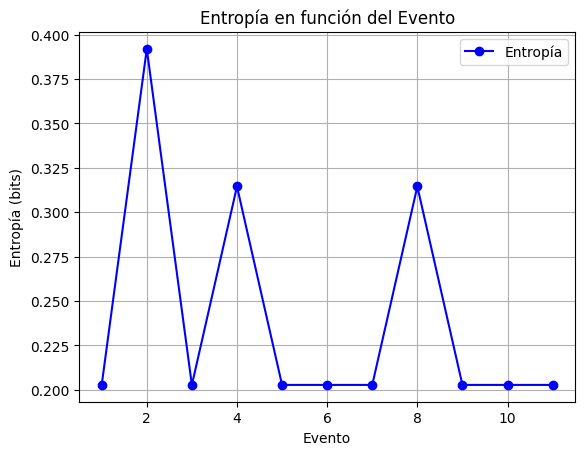

In [143]:
# Visualizamos la entropía de cada evento
plt.plot(cantidad_eventos, entropias, marker='o', linestyle='-', color='b', label='Entropía')
plt.xlabel('Evento')
plt.ylabel('Entropía (bits)')
plt.title('Entropía en función del Evento')
plt.grid(True)
plt.legend()
plt.show()

### Comparación de la información

In [144]:
print("Datos originales:")
print(info_original)
print()

print("Datos transmitidos:")
print(info_transmitida)
print()

print("Datos con ruido:")
print(info_canal)
print()

print("Datos receptados :")
print(info_receptada)

Datos originales:
{'Se detectó': 'mineral', 'Ubicación': (698.9949943788645, -217.34993937502827, 31.17918307652417), 'Imagenes': ['imagen1.jpg', 'imagen2.jpg']}

Datos transmitidos:
{'Se detectó': '01101101011010010110111001100101011100100110000101101100', 'Ubicación': '0000001010111010-0000000110110010000000000011111', 'Imagenes': ['imagen1.jpg', 'imagen2.jpg']}

Datos con ruido:
{'Se detectó': '00101101011011010110111001010111011101100110000101101000', 'Ubicación': '0000001010111000-0100000110110010010000000011111', 'Imagenes': ['imagen1.jpg', 'imagen2.jpg']}

Datos receptados :
{'Se detectó': 'oineral', 'Ubicación': (698, -89, 31), 'Imagenes': ['imagen1.jpg', 'imagen2.jpg']}
